# TF-IDF: Term Frequency - Inverse Document Frequency

## Theory

Intuition: Term Frequency / Document Frequency 

Formula: 

$$
\text{tfidf}(t,d) = \text{tf}(t,d) \times \text{idf}(t)
$$

**Term Frequency (TF)**: Counts how often a term appears in a document, indicating its relevance within that document. It's usually normalized to account for document length.

**Inverse Document Frequency (IDF)**: Measures how rare a term is across the entire corpus. It's calculated as the logarithm of the total number of documents divided by the number of documents containing the term t. IDF reduces the importance of frequently occurring terms and highlights unique ones.

**TF-IDF (TF-IDF)**: It quantifies the importance of a term in a document relative to its occurrence in the entire corpus. Higher TF-IDF values suggest a term is more significant to the document.

## Coding Exercise 
1. Exercise prompt: We are building a recommendation system.
2. Dataset: TMDB 5000 Movie Dataset
3. Hints: 
- Combine movie data into a single string 
- Assume the query is always an exciting movie in the database

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [6]:
df = pd.read_csv('data/tmdb_5000_movies.csv')

In [7]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [12]:
# retrieve 1st row of data to explore the dataset format 
x = df.iloc[0]
x

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

We want to dive deeper into two columns— 'keywords' and 'genres' —because they have words that are super useful for building the recommendation system. 

In [14]:
# extract 'genres' column 
x['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [15]:
x['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [17]:
# convert json format into Python list of Python dictionaries 
j = json.loads(x['genres'])
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [18]:
# join the 
' '.join(''.join(jj['name'].split()) for jj in j)

'Action Adventure Fantasy ScienceFiction'

In [19]:
# convert the relevant data for each movie into a single string
# to be ingested by TfidfVectorizer
def genres_and_keywords_to_string(row):
    genres = json.loads(row['genres'])
    genres = ' '.join(''.join(j['name'].split()) for j in genres)

    keywords = json.loads(row['keywords'])
    keywords = ' '.join(''.join(j['name'].split()) for j in keywords)
    return "%s %s" % (genres, keywords)

In [20]:
df['string'] = df.apply(genres_and_keywords_to_string, axis=1)

In [21]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,string
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action Adventure Fantasy ScienceFiction cultur...
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure Fantasy Action ocean drugabuse exoti...
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Action Adventure Crime spy basedonnovel secret...
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Action Crime Drama Thriller dccomics crimefigh...
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Action Adventure ScienceFiction basedonnovel m...


In [24]:
# limit the number of columns to 200 in the final matrix => keep that most frequent terms in the corpus 
tfidf = TfidfVectorizer(max_features=200)

We dont have a train and a test sets here, as in practice, our vectors would be trained based on the full dataset to maximize the amount of data available. 

In [28]:
X = tfidf.fit_transform(df['string'])

In [29]:
# X is has type of a sparse matrix 
X

<4803x200 sparse matrix of type '<class 'numpy.float64'>'
	with 21870 stored elements in Compressed Sparse Row format>

`movie2idx` will be a Pandas Series where:
- The index consists of movie titles from the DataFrame `df`.
- The values are the corresponding indices of those titles in the DataFrame `df`.

Why is it useful? 
- This Series (movie2idx) can be useful for quickly looking up the index of a movie title in the DataFrame df. 

In [33]:
# df.index : pass the indices of df as values in movie2idx series
# index = df['title'] : pass the 'title' column as index in movie2idx series
movie2idx = pd.Series(df.index, index=df['title'])
movie2idx

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [34]:
idx = movie2idx['John Carter']
idx

4

Why do we need this index? 
- We want to extract a row corresponding to one specific movie from the sparse matrix stored in `X`. 

In [35]:
# query is now a vector 
query = X[idx]
query

<1x200 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [36]:
# print the query vector
query.toarray()

array([[0.        , 0.44215137, 0.21949769, 0.        , 0.25314092,
        0.        , 0.        , 0.        , 0.46491194, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.37937573, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.4987396 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [37]:
# compute similarity between query vector and other vectors in X
scores = cosine_similarity(query, X)
scores

array([[0.44171076, 0.10314386, 0.24307704, ..., 0.        , 0.        ,
        0.        ]])

In [38]:
# currently the array is 1 x N, make it just a 1-D array
scores = scores.flatten()

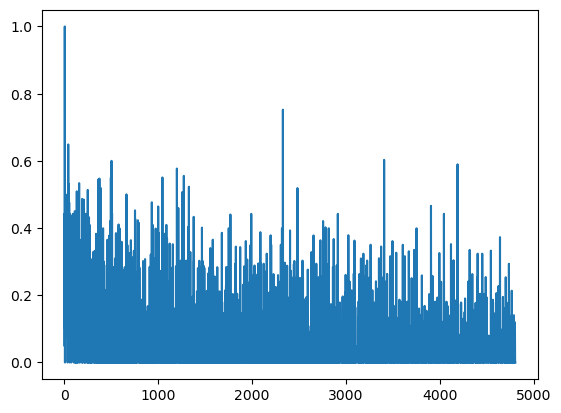

In [39]:
plt.plot(scores)

We obserbe one big spike in the plot, which is actually our movie 'John Carter', as its consine similariry score is 1 between 2 same movies. 

Now, we want to sort the scores in a descending order. By doing so, we can
- find the first 5 largest values 
- we dont care about the score itself but how they rank amongst one another 

In [40]:
(-scores).argsort()

array([   4, 2327,   41, ..., 2373, 2358, 4802])

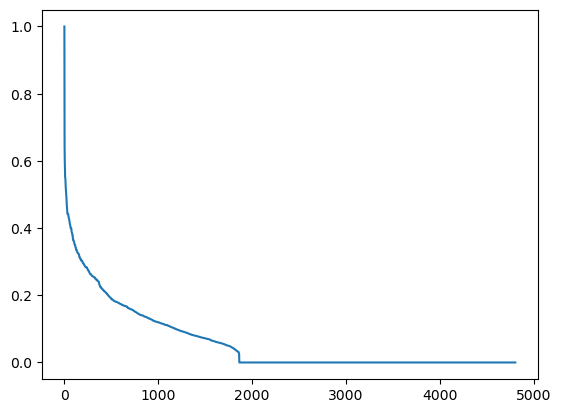

In [41]:
# Uses the sorted indices to rearrange the scores array in descending order
# we dont use .sort() method to avoid modifying the scores' memory 
plt.plot(scores[(-scores).argsort()])

In [42]:
# get top 5 matches
# exclude self (similarity between query and itself yields max score)
recommended_idx = (-scores).argsort()[1:6]

In [43]:
# convert indices back to titles
df['title'].iloc[recommended_idx]

2327                      Predator
41                   Green Lantern
3405    Stargate: The Ark of Truth
502                   The Invasion
4187        Independence Daysaster
Name: title, dtype: object

In [44]:
# create a function that generates recommendations
def recommend(title):
    # get the row in the dataframe for this movie
    idx = movie2idx[title]
    # check if idx is a pandas series, there were multiple of the same title
    if type(idx) == pd.Series:
        idx = idx.iloc[0]

    # calculate the pairwise similarities for this movie
    query = X[idx]
    scores = cosine_similarity(query, X)

    # currently the array is 1 x N, make it just a 1-D array
    scores = scores.flatten()

    # get the indexes of the highest scoring movies
    # get the first K recommendations
    # don't return itself!
    recommended_idx = (-scores).argsort()[1:6]

    # return the titles of the recommendations
    return df['title'].iloc[recommended_idx]

In [46]:
print("Recommendations for 'Avatar':")
print(recommend('Avatar'))

Recommendations for 'Avatar':
61                                Jupiter Ascending
17      Pirates of the Caribbean: On Stranger Tides
47                          Star Trek Into Darkness
507                                Independence Day
2327                                       Predator
Name: title, dtype: object
